# Lab 2: Methods in Linear Regression

## Problems:

### Problem 1: Bootstrapping a Confidence Interval

If we don't have a formula for the confidence interval of a statistic, we can often estimate it by sampling from out data set many times, computing the statistic of interest, and then plotting the distribution. This is known as __bootstrapping__ the confidence interval, since you're using the data to make estimates about your fits, effectively pulling yourself up by your bootstraps. In this problem, we will see how to boot strap the confidence interval for the $\beta$ parameters in the linear fit. 

Lets return to the one variable examples of fitting the sales price to the first floor square footage __1stFlrSF__. Using a for loop, compute $\beta_0$ and $\beta_1$ 1000 times for samples of size $N = 1436$ _with replacement_ and store their results in vectors, as in the code below. 


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

url = 'https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Datasets/Ames/train.csv'

ames = pd.read_csv(url, error_bad_lines = False)

C:\Users\burch\AppData\Local\Temp\ipykernel_1992\505654174.py:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ames = pd.read_csv(url, error_bad_lines = False)


In [2]:
#processing

z = ames['GrLivArea']+ames['BsmtUnfSF']<4000 #remove outliers
data = ames[z]
data = data.select_dtypes(include = ['int64', 'float64'])

data.drop(columns = ['MSSubClass', 'Id']) #MSSubClass and 'Id' are basically categoricals

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,85.0,13175,6,6,1978,1988,119.0,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,66.0,9042,7,9,1941,2006,0.0,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,68.0,9717,5,6,1950,1996,0.0,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


Text(0.5, 1.0, 'Cleaned Data')

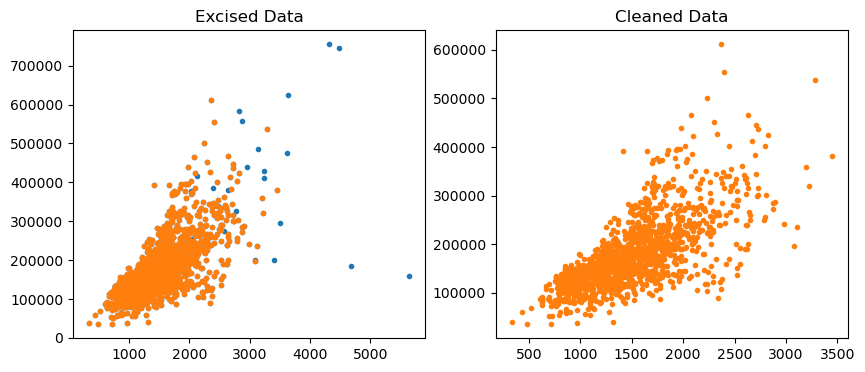

In [3]:
#lets take a look

f, axes = plt.subplots(1,2)
f.set_size_inches(10,4)

axes[0].plot(ames['GrLivArea'],ames['SalePrice'],'.')
axes[0].plot(data['GrLivArea'],data['SalePrice'],'.')
axes[1].plot(data['GrLivArea'],data['SalePrice'],'.',color="C1")

axes[0].set_title("Excised Data")
axes[1].set_title("Cleaned Data")

In [4]:
train_size = round(len(data)*0.8)
test_size = len(data) - train_size

train = data.sample(n=train_size, replace = True, random_state=42) #the instructions explicitly demand the sampling be done with replacement
test = data.sample(n=test_size, replace = True, random_state=42)

print('Train shape:', train.shape)
print('Test shape:', test.shape)

X_train = train.drop(columns = ['Id', 'SalePrice']) #SalePrice will be the dependent variable
Y_train = train['SalePrice']

X_test = test.drop(columns = ['Id', 'SalePrice']) #SalePrice will be the dependent variable
Y_test = test['SalePrice']

Train shape: (1149, 38)
Test shape: (287, 38)


In [5]:
X = np.matrix(X_train['1stFlrSF']) #1stFlrSqFt will be the independent variable
Y = np.matrix(Y_train)

print("X shape",X.shape)
print("Y shape",Y.shape)

X shape (1, 1149)
Y shape (1, 1149)


In [6]:
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

In [7]:
#need to add a column of ones for the affine term
Xa = np.append(np.ones(X.shape),X,1)

In [8]:
N = 1000

beta0 = []
beta1 = []

#store the Xs and Ys so that we can make plots with them later
Xs = []
Ys = []
Xas = []

for i in range(N):
    #computing betas using linear algebra
    train = data.sample(n=train_size, replace = True) #the instructions explicitly demand the sampling be done with replacement
    test = data.sample(n=test_size, replace = True)

    X_train = train.drop(columns = ['Id', 'SalePrice']) #SalePrice will be the dependent variable
    Y_train = train['SalePrice']

    X_test = test.drop(columns = ['Id', 'SalePrice']) #SalePrice will be the dependent variable
    Y_test = test['SalePrice']
    
    X = np.matrix(X_train['1stFlrSF']) #1stFlrSqFt will be the independent variable
    Y = np.matrix(Y_train)
    
    X = X.reshape(-1, 1)
    Xs.append(X)
    Y = Y.reshape(-1, 1)
    Ys.append(Y)
    
    Xa = np.append(np.ones(X.shape),X,1)
    Xas.append(Xa)
    
    #here's the linear algebra:
    beta = list((Xa.T*Xa).I*Xa.T*Y)
    
    beta0.append(float(beta[0]))
    beta1.append(float(beta[1]))
    
beta0 = np.array(beta0)
beta1 = np.array(beta1)
    

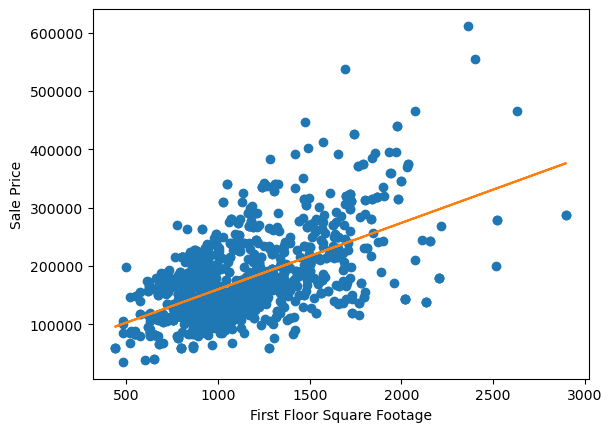

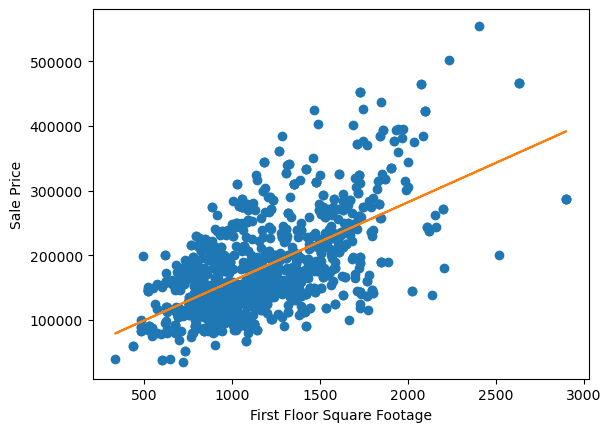

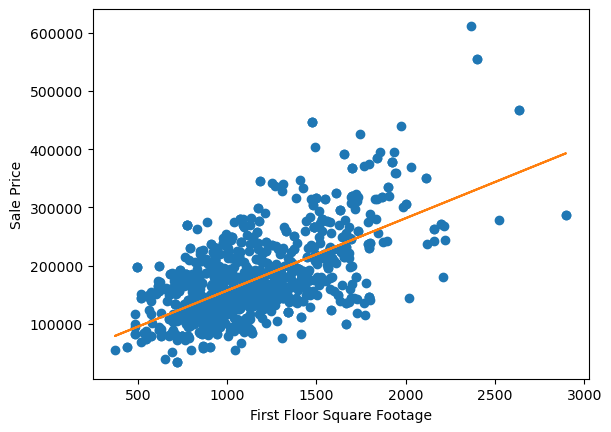

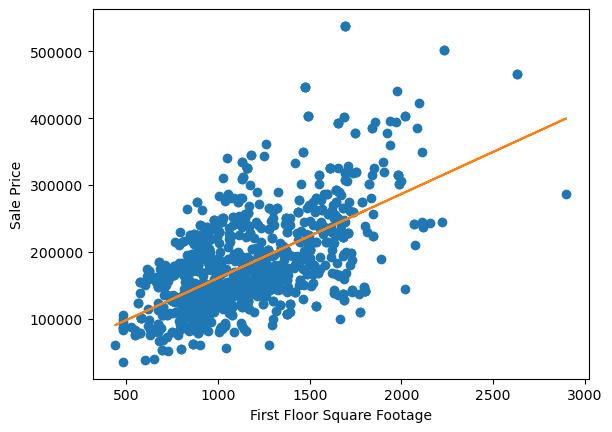

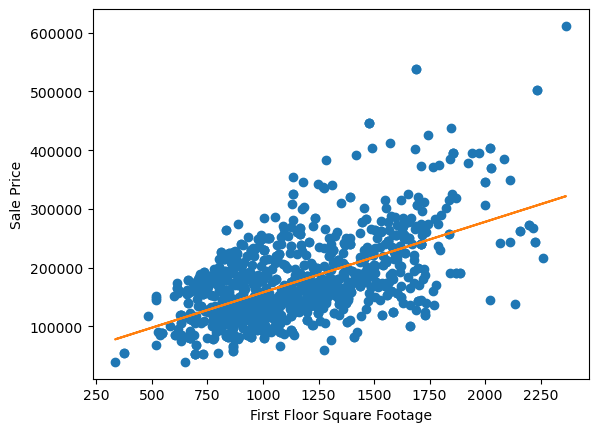

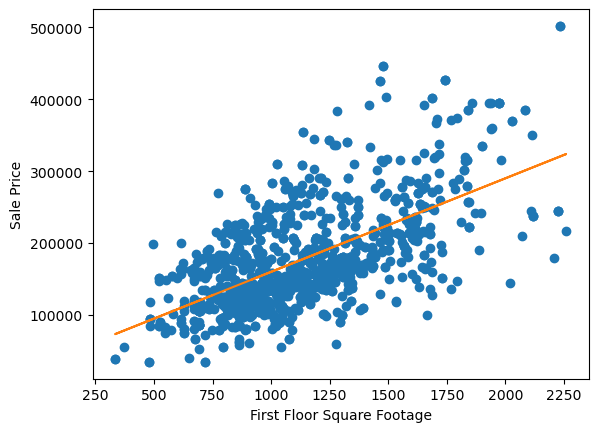

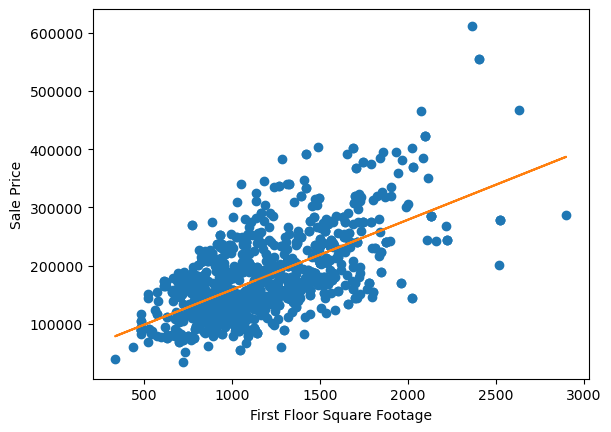

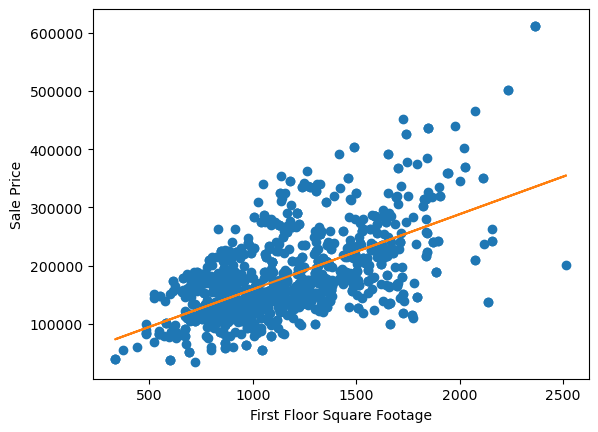

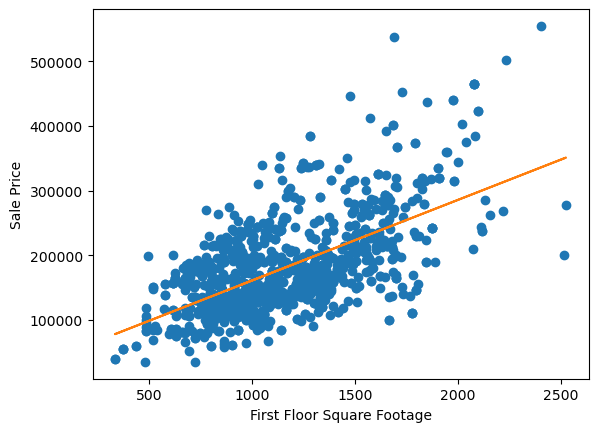

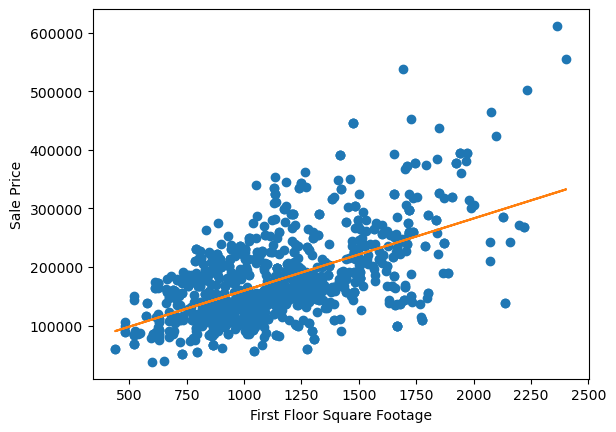

In [9]:
#lets look at the data against a few fit lines

for i in range(10):
    plt.figure()
    beta = np.array([beta0[i], beta1[i]]).reshape(2, 1)
    plt.plot(Xs[i], Ys[i], 'o')
    plt.plot(Xs[i], Xas[i]*beta)
    plt.xlabel('First Floor Square Footage')
    plt.ylabel('Sale Price')

In [10]:
#indeed, the best fit lines seems to be about as good as they could be

In [11]:
#now lets do a histogram

In [12]:
lin_fits = {'Beta0': beta0, 'Beta1': beta1}
fits = pd.DataFrame(lin_fits)
display(fits)

,Beta0,Beta1
0,45854.888881,113.984828
1,38128.863087,122.001707
2,33423.283026,124.093236
3,35189.460801,125.700529
4,37569.934404,120.177025
...,...,...
995,29665.413066,128.051320
996,40679.338666,118.845339
997,37101.626790,123.178376
998,32676.896603,126.522238


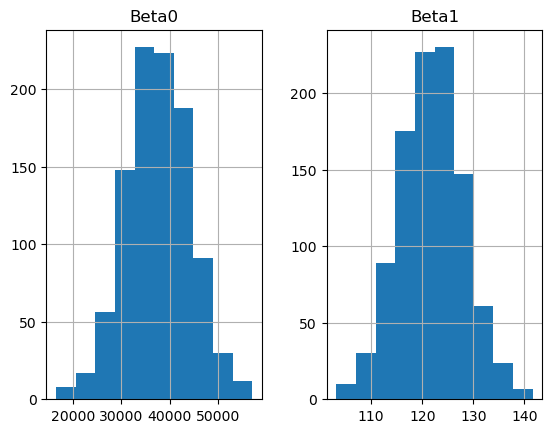

In [13]:
fits.hist()
plt.show()

__Turn in__

1. Plot a histogram of $\beta_0$ and $\beta_1$. 
2. Using `beta0.sort()`, sort the values and find the interval containing the middle 950 values. This is the bootstrap 95% confidence interval. 
3. Using the formulas from Lecture 3, compute the confidence interval using the $z$-score. Remember that here you use all of the training data. Compare your results. 

In [14]:
#lets repeat these calculations, but lets compute betas using sklearn linear regression

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

N = 1000

beta0_lr = []
beta1_lr = []

#store the Xs and Ys so that we can make plots with them later
Xs_lr = []
Ys_lr = []
Xas_lr = []

for i in range(N):
    #computing betas using linear algebra
    train = data.sample(n=train_size, replace = True) #the instructions explicitly demand the sampling be done with replacement
    test = data.sample(n=test_size, replace = True)

    X_train = train.drop(columns = ['Id', 'SalePrice']) #SalePrice will be the dependent variable
    Y_train = train['SalePrice']
    
    X = np.matrix(X_train['1stFlrSF']) #1stFlrSqFt will be the independent variable
    Y = np.matrix(Y_train)
    
    X = X.reshape(-1, 1)
    Xs_lr.append(X)
    Y = Y.reshape(-1, 1)
    Ys_lr.append(Y)
    
    Xa = np.append(np.ones(X.shape),X,1)
    Xas_lr.append(Xa)
    
    lr.fit(X,Y)
    beta0_lr.append(float(lr.coef_))
    beta1_lr.append(float(lr.intercept_))
    
beta0_lr = np.array(beta0_lr)
beta1_lr = np.array(beta1_lr)

C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-

C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-

C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-

C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-

C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-

C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-

C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-

C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-

C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-

C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-

C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\burch\anaconda3\lib\site-

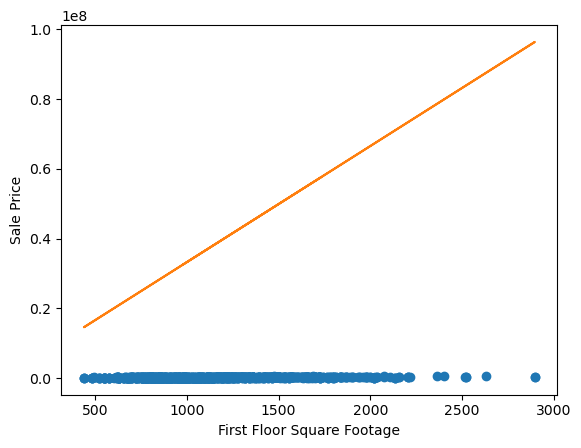

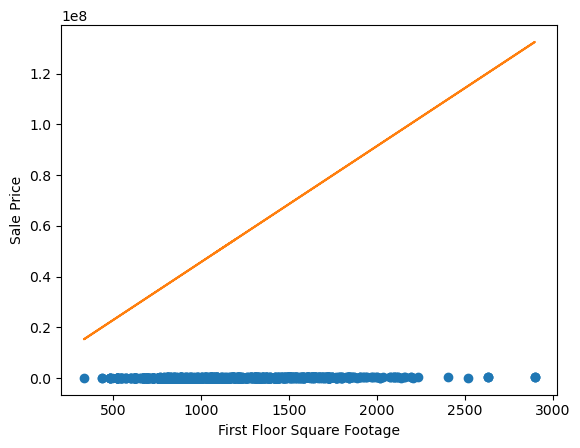

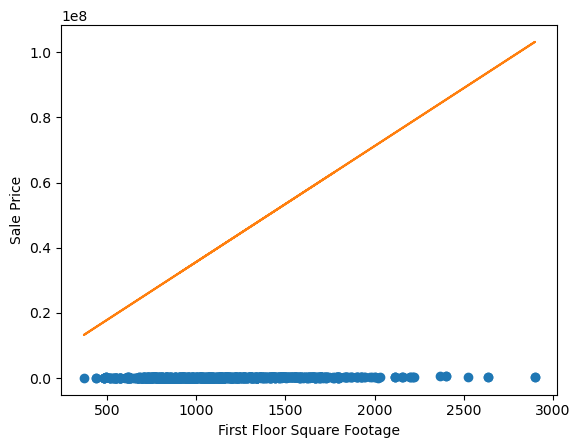

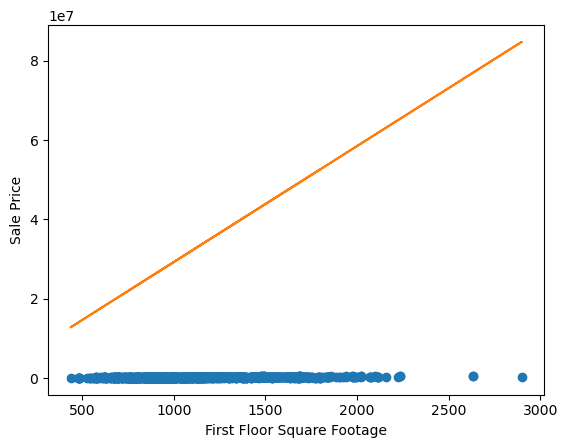

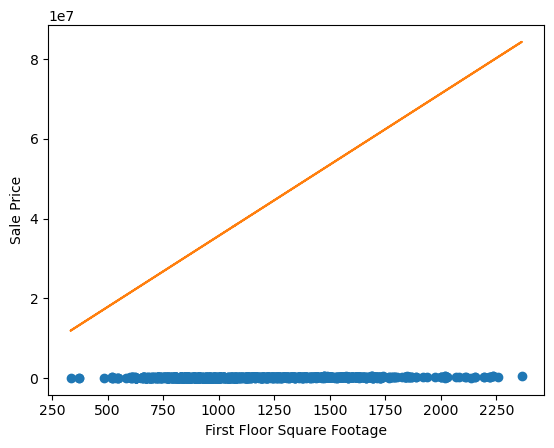

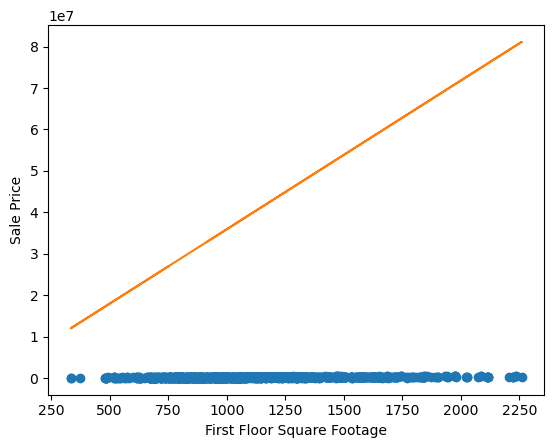

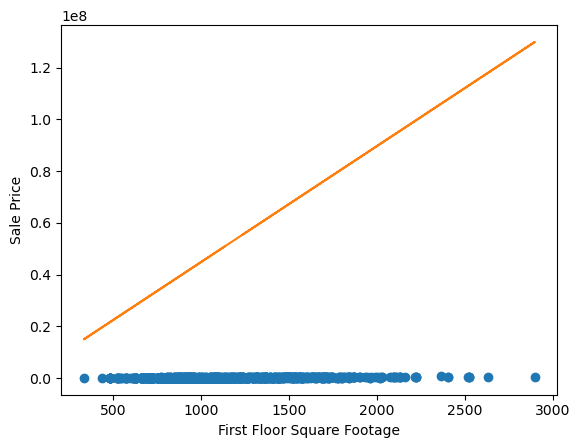

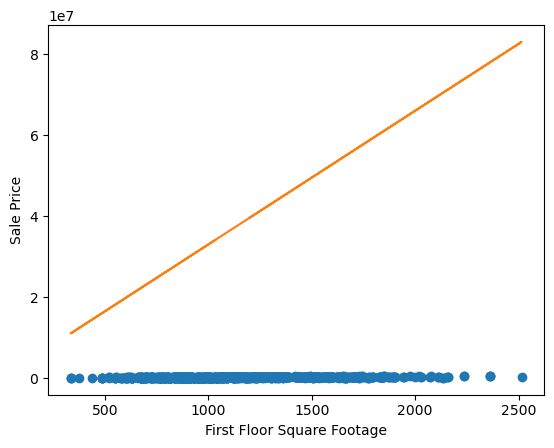

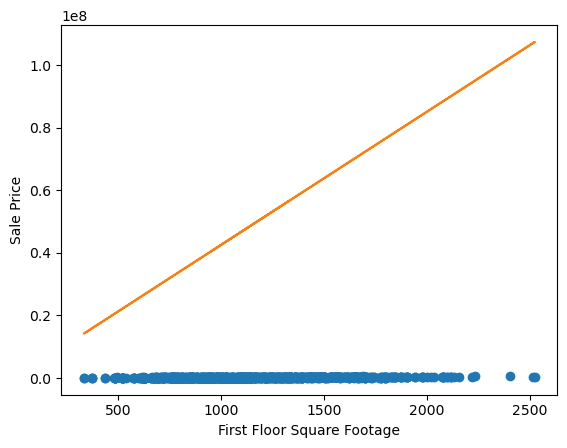

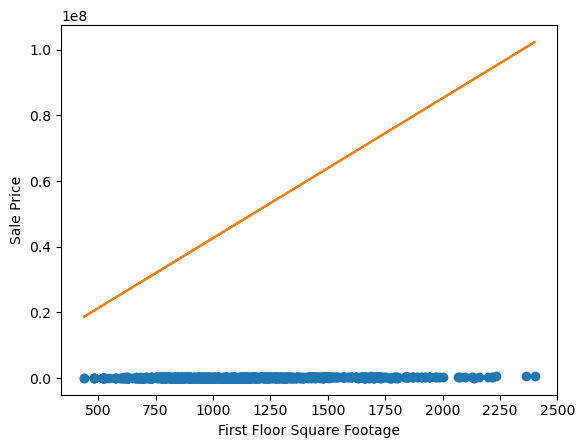

In [16]:
#lets plot the data and the fits

for i in range(10):
    plt.figure()
    beta = np.array([beta0_lr[i], beta1_lr[i]]).reshape(2, 1)
    plt.plot(Xs[i], Ys[i], 'o')
    plt.plot(Xs[i], Xas[i]*beta)
    plt.xlabel('First Floor Square Footage')
    plt.ylabel('Sale Price')

In [17]:
#What on Earth is happening? 
#Examine the y axis. For some reason the predicted housing price is being projected on the scale of 10^8
#lets compare the betas

for i in range(15):
    print("linear algebra beta0", beta0[i], "linear regression beta0", beta0_lr[i])
    print("linear algebra beta1", beta1[i], "linear regression beta0", beta1_lr[i])

linear algebra beta0 45854.88888094414 linear regression beta0 127.93083599388444
linear algebra beta1 113.9848276816123 linear regression beta0 33255.09932462606
linear algebra beta0 38128.86308652479 linear regression beta0 114.24706080454237
linear algebra beta1 122.00170709734385 linear regression beta0 45741.081301530794
linear algebra beta0 33423.283025897275 linear regression beta0 123.13583083936695
linear algebra beta1 124.093235558479 linear regression beta0 35606.754688254965
linear algebra beta0 35189.460800614375 linear regression beta0 127.97367477596657
linear algebra beta1 125.70052867003452 linear regression beta0 29238.072893716162
linear algebra beta0 37569.9344036146 linear regression beta0 126.29940609115165
linear algebra beta1 120.17702484603535 linear regression beta0 35664.45093658479
linear algebra beta0 30104.698836274456 linear regression beta0 121.31522962124055
linear algebra beta1 129.96014745677323 linear regression beta0 35910.655247795075
linear algebr

In [18]:
#so for some reason, LinearRegression is doing very poorly with this data set

### Problem 2: Linear Methods on High Dimensional Data

Perform ridge regression and lasso regression on the MRI Slices dataset on blackboard. You should follow the __Loading the Viewing MRI Slices__ notebook, eventually loading all slices into Python as a data matrix, with all picture dimensions flattened. The text and code for that process has been reproduced below.

We want to fit the MRI Slices data to the label __CDR__ in the labels data.


__Turn in__: 

1. Given the train-test split with seed $255$, what is the best $\alpha$ value for pure Ridge Regression? Justify your answer. 
2. Given the train-test split with seed $255$, what is the best $\lambda$ value for pure Lasso Regression? Justify your answer. 
3. (Bonus) What is the best $(\alpha,\lambda)$ value for elastic net regression?

You may set the downsample rate to higher you are unable to compute the linear model.

### Load MRI All Files

To load all of the files into an array we need to be able to search through the directory. Luckily, this is easy to do using the labels file, since each file name is stored there. We just need to loop through the __Filename__ column in the `labels` dataset and load them into an array one by one. There are 702 files in total. 

With the array there are two ways we can load them in: First, we can load them into a $702\times 176 \times 208$ array, which is the best option if we care about the 2D structure. However for algorithms like linear regression that done see the 2D structure, we may want to flatten the images to a $702\times 36608$ array (note that $36608 = 176 \times 208$). Its easy enough two switch back and forth between the two array structures later. We will start with the flattened array. 

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

file_dir = 'C:/Users/burch/OneDrive/Documents/MRI_Slices/'

labels = pd.read_csv(file_dir + 'labels.csv')
display(labels)

,Unnamed: 0,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Filename
0,0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,OAS1_0001_MR1_mpr_n4_anon_111_t88_gfc_44.png
1,1,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,OAS1_0001_MR1_mpr_n4_anon_111_t88_gfc_86.png
2,2,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,OAS1_0001_MR1_mpr_n4_anon_111_t88_gfc_128.png
3,3,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,OAS1_0002_MR1_mpr_n4_anon_111_t88_gfc_44.png
4,4,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,OAS1_0002_MR1_mpr_n4_anon_111_t88_gfc_86.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,697,OAS1_0456_MR1,M,R,61,5.0,2.0,30.0,0.0,1637,0.780,1.072,NaN,OAS1_0456_MR1_mpr_n4_anon_111_t88_gfc_86.png
698,698,OAS1_0456_MR1,M,R,61,5.0,2.0,30.0,0.0,1637,0.780,1.072,NaN,OAS1_0456_MR1_mpr_n4_anon_111_t88_gfc_128.png
699,699,OAS1_0457_MR1,F,R,62,3.0,3.0,26.0,0.0,1372,0.766,1.279,NaN,OAS1_0457_MR1_mpr_n3_anon_111_t88_gfc_44.png
700,700,OAS1_0457_MR1,F,R,62,3.0,3.0,26.0,0.0,1372,0.766,1.279,NaN,OAS1_0457_MR1_mpr_n3_anon_111_t88_gfc_86.png


In [20]:
DS = 8             # Downsample rate, must be a multiple of 36608

if 36608/DS % 1 > 0:
    print("Downsample rate is not a multiple of 36608")
    DS = 1
    im_size = 36608
else:
    im_size = int(36608/DS)


data = np.zeros([702, im_size])

for i, file_name in enumerate(labels.Filename):
    img = np.mean(matplotlib.image.imread(file_dir + file_name),axis=2).reshape(-1)
    data[i,:] = img[::DS]            # Downsample the image

In [67]:
df = pd.DataFrame(data)
display(df)

,0,1,2,3,4,5,6,7,8,9,...,4566,4567,4568,4569,4570,4571,4572,4573,4574,4575
0,0.623529,0.623529,0.623529,0.623529,0.600000,0.938235,0.741176,0.791176,0.558824,0.870588,...,0.308824,0.317647,0.582353,0.623529,0.623529,0.623529,0.623529,0.623529,0.623529,0.623529
1,0.623529,0.623529,0.661765,0.308824,0.726471,0.414706,0.694118,0.464706,0.935294,0.682353,...,0.270588,0.958824,0.344118,0.261765,0.264706,0.455882,0.623529,0.623529,0.623529,0.623529
2,0.623529,0.623529,0.623529,0.623529,0.679412,0.320588,0.302941,0.635294,0.802941,0.955882,...,0.505882,0.623529,0.623529,0.623529,0.623529,0.623529,0.623529,0.623529,0.623529,0.623529
3,0.623529,0.623529,0.623529,0.623529,0.635294,0.558824,0.388235,0.458824,0.605882,0.855882,...,0.991176,0.291176,0.335294,0.623529,0.623529,0.623529,0.623529,0.623529,0.623529,0.623529
4,0.623529,0.623529,0.623529,0.520588,0.397059,0.938235,0.911765,0.511765,0.802941,0.676471,...,0.882353,0.758824,0.861765,0.967647,0.294118,0.308824,0.605882,0.623529,0.623529,0.623529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,0.626471,0.976471,0.617647,0.673529,0.932353,0.794118,0.429412,0.958824,0.994118,0.370588,...,0.282353,0.917647,0.976471,0.314706,0.300000,0.320588,0.311765,0.273529,0.302941,0.276471
698,0.997059,0.811765,0.920588,0.735294,0.273529,0.302941,0.252941,0.582353,0.614706,0.464706,...,0.302941,0.252941,0.341176,0.976471,0.344118,0.250000,0.273529,0.941176,0.976471,0.264706
699,0.785294,0.944118,0.941176,0.914706,0.717647,0.917647,0.297059,0.788235,0.344118,0.358824,...,0.982353,0.320588,0.323529,0.382353,0.255882,0.297059,0.250000,0.329412,0.273529,1.000000
700,0.805882,0.741176,0.897059,0.717647,0.535294,0.285294,0.344118,0.729412,0.773529,0.394118,...,0.911765,0.267647,0.250000,0.932353,0.308824,0.964706,0.323529,0.255882,0.926471,0.979412


In [22]:
df.info()

#CDR is going to be the target variable. Note that the dataframe above has no information about the target
#The test train split is going to randomize the order of the rows, so we need to insert the CDR information before constructing the split
df.insert(0, "CDR", labels.CDR, True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Columns: 4576 entries, 0 to 4575
dtypes: float64(4576)
memory usage: 24.5 MB


In [64]:
#test-train split

train_size = round(702*0.8)

train = df.sample(n = train_size, replace = False, random_state = 200)
test = df.drop(train.index)

#this is very weird, but certain random states give a bad sampling that results in a ValueError when performing regression below

In [43]:
print("Train Shape", train.shape)
print("Test Shape", test.shape)

Train Shape (562, 4577)
Test Shape (140, 4577)


In [65]:
X_train = train.drop(columns = ['CDR'])
Y_train = train['CDR']

X_test = test.drop(columns = ['CDR'])
Y_test = test['CDR']

print('Shape of X_train:', X_train.shape)
print('Shape of Y_train:', Y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_test:', Y_test.shape)

Shape of X_train: (562, 4576)
Shape of Y_train: (562,)
Shape of X_test: (140, 4576)
Shape of Y_test: (140,)


In [26]:
import math
import statsmodels.api as sm

In [27]:
def RSS(y,Y): #residual sum squared
    y = np.matrix(y).reshape(-1,1)
    Y = np.matrix(Y).reshape(-1,1)
    
    return (y-Y).T*(y-Y)

def RMS(y,Y): #root mean squared
    return np.sqrt(RSS(y,Y))/len(y)

def Rs(y,Y): #R squared
    y = np.matrix(y).reshape(-1,1)
    Y = np.matrix(Y).reshape(-1,1)
    
    return 1 - RSS(y,Y)/((Y - np.mean(Y)).T*(Y - Y.mean()))

In [66]:
#build model, return r squared
ols = sm.OLS(Y_train, sm.add_constant(X_train))
ols_result = ols.fit_regularized(L1_wt=0,alpha=1)

Rs(ols_result.predict(sm.add_constant(X_test)),Y_test)

matrix([[0.0540737]])

In [68]:
ols_result.predict(sm.add_constant(X_test))

0      0.239050
2      0.287161
6      0.287769
7      0.404023
17     0.313275
         ...   
679    0.257369
686    0.366570
695    0.218684
698    0.127035
700    0.287132
Length: 140, dtype: float64

In [70]:
pred = ols_result.predict(sm.add_constant(X_test))

print(Rs(pred, Y_test))
print(RMS(pred, Y_test))

[[0.0540737]]
[[0.02985011]]


In [71]:
#build a model using a variety of alphas
r_sqds = []
alphas = np.linspace(0,2, 20)

for alp in alphas:
    ols = sm.OLS(Y_train, sm.add_constant(X_train))
    ols_result = ols.fit_regularized(L1_wt=0,alpha=alp)

    r_sqds.append(Rs(ols_result.predict(sm.add_constant(X_test)),Y_test).A1)

0.05430949765279036


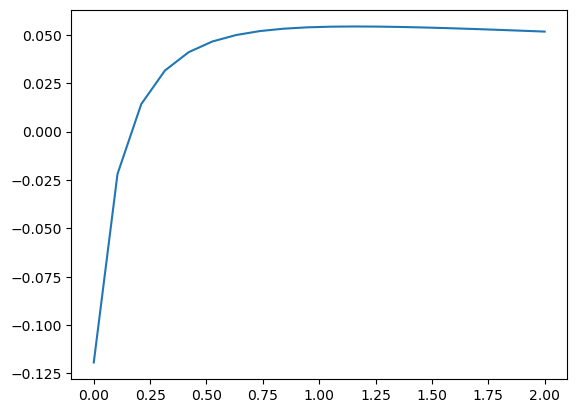

In [72]:
print(np.max(r_sqds))
plt.plot(alphas, r_sqds)

In [73]:
#optimal alpha appears to be alpha = 0.9

ols = sm.OLS(Y_train, sm.add_constant(X_train))
ols_result = ols.fit_regularized(L1_wt=0,alpha=0.9)

print(Rs(ols_result.predict(sm.add_constant(X_test)),Y_test))

[[0.0536028]]


In [74]:
#lasso regression

lasso_r_sqds = []
rss_s = []
betas = pd.DataFrame(columns=["Coeff"]+list(X_train))
alphas = np.linspace(0,1,20)

for alp in alphas:
    ols = sm.OLS(Y_train, sm.add_constant(X_train))
    ols_result = ols.fit_regularized(L1_wt=1,alpha=alp)

    lasso_r_sqds.append(Rs(ols_result.predict(sm.add_constant(X_test)),Y_test).A1)
    rss_s.append(RMS(ols_result.predict(sm.add_constant(X_test)),Y_test).A1)
    beta = pd.DataFrame(np.array(ols_result.params).reshape(1,-1),columns=["Coeff"]+list(X_train))
    betas = betas.append(beta)

C:\Users\burch\AppData\Local\Temp\ipykernel_1992\3748501405.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(beta)
C:\Users\burch\AppData\Local\Temp\ipykernel_1992\3748501405.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(beta)
C:\Users\burch\AppData\Local\Temp\ipykernel_1992\3748501405.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(beta)
C:\Users\burch\AppData\Local\Temp\ipykernel_1992\3748501405.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  betas = betas.append(beta)
C:\Users\burch\AppData\Local\Temp\ipykernel_1992\3748501405.py:15: FutureWarning: Th

-0.06705139472839261
0.0411877235523957


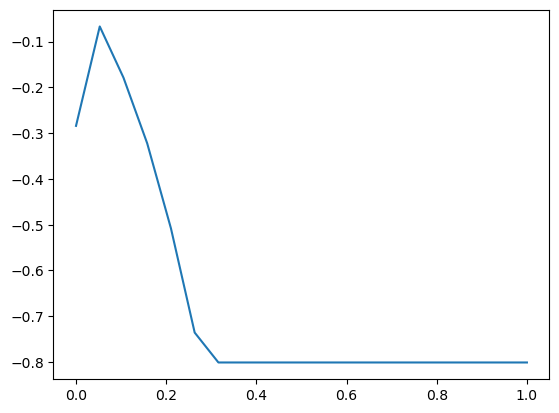

In [75]:
print(np.max(lasso_r_sqds))
print(np.max(rss_s))
plt.plot(alphas, lasso_r_sqds)

In [76]:
#Lasso regression with lambda = 0.05 (alpha still equal to 1), which is a substantial improvment over lambda = 1.
ols = sm.OLS(Y_train, sm.add_constant(X_train))
ols_result = ols.fit_regularized(L1_wt=0.05,alpha=1)

Rs(ols_result.predict(sm.add_constant(X_test)),Y_test)

matrix([[-0.07648964]])

In [77]:
#regression combining the two optimal values
ols_result = ols.fit_regularized(L1_wt=0.05,alpha=0.9)

Rs(ols_result.predict(sm.add_constant(X_test)),Y_test)

matrix([[-0.06515105]])

1) With the seed = 100, alpha = 0.9 is the best for ridge regression.
2) With the seed = 100, lambda = 0.05 is the best for lasso regression.
This is because with these value of alpha and lamda maximize r^2. Hence, these values of alpha and lamda minimize RSS.